In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [3]:
vader_df = pd.read_csv('thread_sentiment.csv', index_col=0)
bert_df = pd.read_csv('thread_sentiment_bert.csv', index_col=0)
bert_truncated = pd.read_csv('regression_df_bert_truncated.csv', index_col=0)

(-1.0, 1.0)

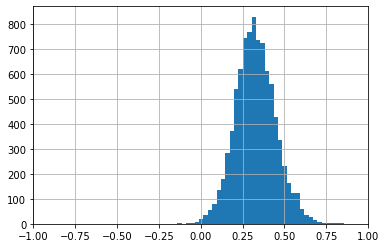

In [39]:
vader_df['sentiment_score'].hist(bins=50)
plt.xlim([-1,1])

(1.0, 5.0)

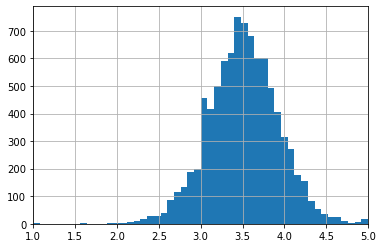

In [40]:
bert_df['sentiment_score'].hist(bins=50)
plt.xlim([1,5])

In [4]:
bigdf = bert_df.merge(vader_df, on='id', how='inner')

In [6]:
bigdf[['sentiment_score_x', 'sentiment_score_y']].corr()

,sentiment_score_x,sentiment_score_y
sentiment_score_x,1.000000,0.604886
sentiment_score_y,0.604886,1.000000


In [7]:
bigdf[['sentiment_score_x', 'sentiment_score_y']]

,sentiment_score_x,sentiment_score_y
0,3.578947,0.298800
1,2.708333,0.246371
2,3.238095,0.251314
3,3.250000,0.209415
4,3.400000,0.350935
...,...,...
8884,3.272727,0.374164
8885,3.785714,0.246771
8886,2.647059,0.138361
8887,3.500000,0.247779


In [15]:
scaler = MinMaxScaler()

In [24]:
vader_s = vader_df['sentiment_score']
vader_s = vader_s[:, np.newaxis]

<ipython-input-24-0d7c572d516c>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  vader_s = vader_s[:, np.newaxis]


In [26]:
bert_s = bert_df['sentiment_score']
bert_s = bert_s[:, np.newaxis]

<ipython-input-26-a52c6cac1586>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  bert_s = bert_s[:, np.newaxis]


In [27]:
vader_scaled = scaler.fit_transform(vader_s)
bert_scaled = scaler.fit_transform(bert_s)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

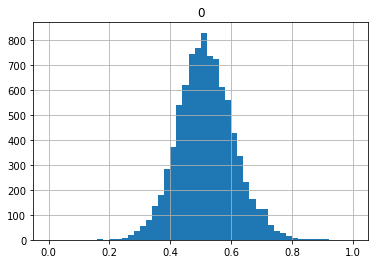

In [29]:
pd.DataFrame(vader_scaled).hist(bins = 50)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

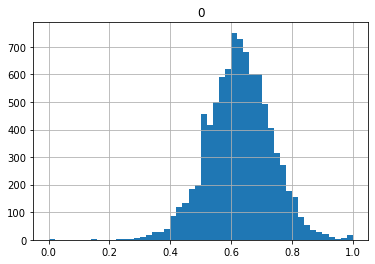

In [30]:
pd.DataFrame(bert_scaled).hist(bins = 50)